# Carga de libreriás 

In [1]:
import json
import os 
import utils
import random
from collections import Counter
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
local_path = os.getcwd()
random_seed=15
parent_path = os.path.abspath(os.path.join(local_path, os.pardir))

In [2]:
# Tamaño por defecto para las imagenes generadas 
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Carga de los datos y preprocesamiento 

El primer paso para solucionar este problema fue cargar los datos alojados en el archivo JSON y procesarlos de en función de las transformaciones necesarias. 

In [3]:
data_file = open(parent_path+'/data/clasificador/clasificador.json',)
data = json.load(data_file)
data_file.close()

Antes de poder realizar el preprocesamiento del texto, fue necesario obtener los tweets que serian la entrada del modelo con sus respectivas etiquetas (rangos de edad). Por simplicidad, y debido a las restricciones de tiempo estipuladas en la guía del problema, asumí que la edad del tweet sería el valor más pequeño del rango estipulado. Otro posible acercamiento es asumir que la edad se distribuye de forma normal entre el rango dado, y utilizar una muestra de la distribución cómo la edad del usuario. 


In [4]:
sentences = list(data['text'].values())
ages = [age_range.split('-')[0] for age_range in list(data['age_range'].values())]

Una vez se tuvo la lista de edades, se halló la frecuencia de cada edad en la base de datos y se grafico en un digrama de barras. Esto con el fin de entender mejor la distribución de esta variable, y analizar que clase de problema se debia atacar. 

Dado que el set de edades consta únicamente de 6 valores posibles, se tomo la decisión de atacar este problema cómo un problema de clasificación multiclase donde cada una de las edades representa una clase. 

In [129]:
# Función que mapea de edad a etiqueta
map_dict = {or_label:new_label for new_label,or_label in enumerate(set(ages))}
inv_map_dict = {value:key for key,value in map_dict}
print(map_dict)
# Mapeo de todas las edades a etiquetas 
labels = list(map(lambda x: map_dict[x],ages))

{'65': 0, '35': 1, '25': 2, '13': 3, '18': 4, '50': 5}


Text(0, 0.5, 'Frecuencia')

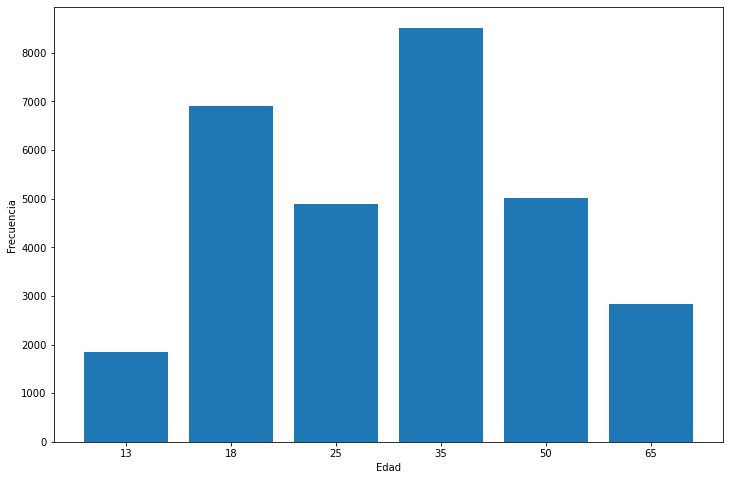

In [6]:
labels_count = dict(sorted(dict(Counter(ages)).items(), key=lambda item: item[0]))
plt.bar(labels_count.keys(),labels_count.values())
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

El siguiente paso consistio en preprocesar los tweets. Para esta solución, el preprocesamiento de un tweet se divide en 2 partes. 

1. Se eliminan los acentos, los hashtags, las menciones, los retweets, los hipervínculos y los precios (e.g. \$300). Este procedimiento lo realiza la función ***utils.process_tweet***.
2. Paso siguiente, se divide el tweet resultante del primer paso en tokens y se pasa a minúsculas, se lleva cada uno de los tokens a su forma raíz utilizando una función de stemming, y por último se eliminan los signos de puntuación, las stopwords (palabras no relevantes ó vacías) y los token que solo representen números. 

A continuación se presenta un ejemplo de una oración antes y despues de pasar por el primer paso del proceso de preprocesamiento. 

In [7]:
sentence_idx = random.randint(0,len(sentences)-1)
print(sentence_idx)
print('Original Tweet: ',sentences[sentence_idx])
print(' \n Processed Tweet:', utils.process_tweet(sentences[sentence_idx]))

1353
Original Tweet:  @Tefiv4 siento q en cualquier momento le da algo
 
 Processed Tweet:  siento q en cualquier momento le da algo


In [8]:
# Lista que contiene todas las oraciones despues de pasar por la función utils.process_tweet
processed_sentences = [utils.process_tweet(sentence) for sentence in sentences]

Antes de pasar al segundo paso del preprocesamiento de los tweets, es necesario dividir la base de datos en un set de entrenamiento y un set de pruebas. En este caso se tomó 90% de los datos para entrenar y 10% de los datos para probar. 

In [9]:
train_sentences, test_sentences, y_train, y_test = train_test_split(sentences, labels, test_size=0.1, random_state=random_seed)

Por último, se utilizó la función ***TfidfVectorizer*** de la librería sklearn para tokenizar los tweets procesados, crear un vocabulario con las palabras del set de entrenamiento, y hallar la representación tfidf de cada palabra en cada oración. 

In [55]:
# vectorizer = CountVectorizer(tokenizer = utils.tokenizer, preprocessor = utils.process_tweet, stop_words = stopwords_sp)
vectorizer = TfidfVectorizer(tokenizer = utils.tokenizer, 
                             preprocessor = utils.process_tweet,
                             max_df = 0.8,
                             min_df = 0)

In [56]:
X_train = vectorizer.fit_transform(train_sentences)
X_test = vectorizer.transform(test_sentences)

In [57]:
# Dimensiones de la matriz de entrenamiento
X_train.shape

(27000, 29785)

In [58]:
# Vocabulario hallado por la función 
vectorizer.vocabulary_

{'ok': 20171,
 'preocup': 22488,
 'van': 28597,
 'tocar': 27502,
 'pta': 23038,
 'avisart': 3259,
 'cuanto': 7640,
 'paga': 20564,
 'jefe': 16006,
 'ahora': 1315,
 'prensa': 22487,
 'merm': 18452,
 'defendia': 8203,
 'intach': 15336,
 'q': 23210,
 'apoyan': 2316,
 'vacunado': 28501,
 'if': 14456,
 'onli': 20262,
 'we': 29411,
 'had': 13766,
 'one': 20257,
 'quem': 23312,
 'amou': 1876,
 'misma': 18783,
 'pongo': 22180,
 'alarma': 1446,
 'dia': 9190,
 '8:': 391,
 'meterm': 18502,
 'pagina': 20583,
 'minuto': 18741,
 'reiniciando': 24135,
 'mal': 17625,
 'estan': 11336,
 'manejando': 17809,
 'boca': 4031,
 'ma': 17496,
 'grand': 13395,
 'bueno': 4388,
 'encanta': 10480,
 'est': 11301,
 'leyendo': 16934,
 'biblia': 3873,
 'salga': 25203,
 'publicidad': 23062,
 'tarot': 26994,
 'hechan': 13922,
 'culpa': 7788,
 'usted': 28423,
 'mismo': 18786,
 'acepta': 696,
 'miseria': 18774,
 'convertido': 7140,
 'venezuela': 28780,
 'demostrado': 8415,
 'ud': 28203,
 'persist': 21525,
 'ignorarlo': 144

# Balanceo de los datos

Dado que el set de datos esta altamente desbalanceado, la idea es utilizar algunas técnicas de sobresampleo y subsampleo simples que le permitan al modelo generalizar mejor en las clases minoritarias. Para esto se uso la librería ***imbalanced_learn***, en particular las funciones ***SMOTE*** y ***RandomUnderSampler***. 

In [59]:
from imblearn.over_sampling import *
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Text(0, 0.5, 'Frecuencia')

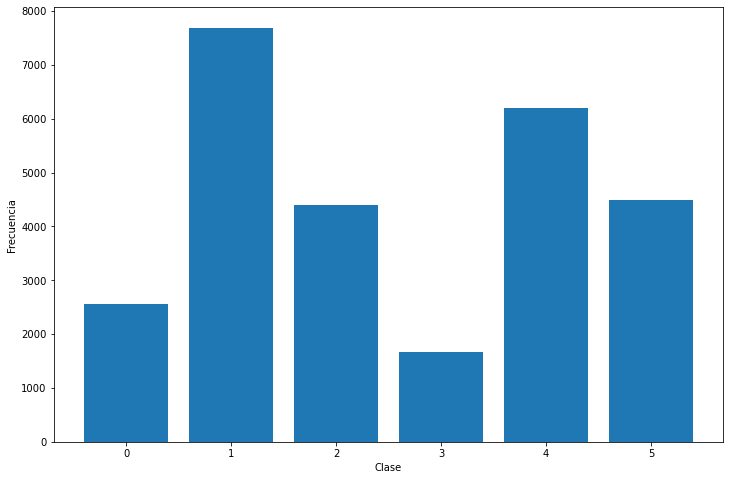

In [60]:
# Distribución original de los datos en el set de entrenamiento
labels_count = dict(sorted(dict(Counter(y_train)).items(), key=lambda item: item[0]))
plt.bar(labels_count.keys(),labels_count.values())
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

In [61]:
# Estrategia utilizada para la función de subsampleo, 
# La idea es indicar cuantos ejemplos quiero de cada clase al acabar con el proceso de subsampleo

strategy = {key:(4500 if value>4500 else value) for key,value in labels_count.items()}
strategy

{0: 2555, 1: 4500, 2: 4399, 3: 1667, 4: 4500, 5: 4495}

In [62]:
undersampler = RandomUnderSampler(sampling_strategy=strategy)
oversampler = SMOTE(random_state = random_seed,n_jobs=-1)
steps = [('u', undersampler),('o', oversampler)]
pipeline = Pipeline(steps=steps)

In [63]:
X_train_os, y_train_os = pipeline.fit_resample(X_train, y_train)

Text(0, 0.5, 'Frecuencia')

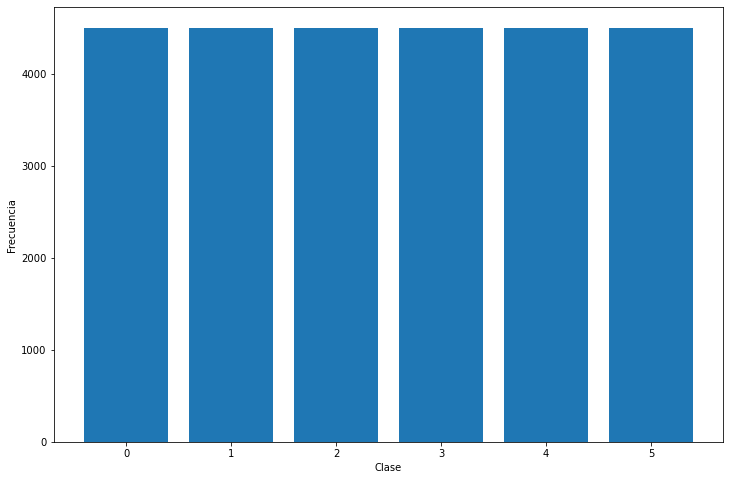

In [64]:
# Distribución de las etiquetas en el set de entrenamiento al acabar el proceso de subsampleo y sobresampleo. 
os_labels_count = dict(sorted(dict(Counter(y_train_os)).items(), key=lambda item: item[0]))
plt.bar(os_labels_count.keys(),os_labels_count.values())
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Modelo y resultados

Se tomo la decisión de utilizar un RandomForest cómo clasificador por dos razones. La primera es que la implementación que podemos encontrar en la librería ***scikit-learn*** es una implementación distribuida, lo cual permite entrenar diferentes modelos y hacer pruebas rapidamente. La segunda, es que en mi experiencia este tipo de modelos proveen un buen punto de inicio sin necesidad de iterar demasiadas veces, o de ajustar de forma minuciosa sus hiperparámetros.   

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import cross_validate,RandomizedSearchCV

In [134]:
clf = RandomForestClassifier(n_jobs=-1,random_state=15, verbose=1)

## Evaluación de resultados utilizando el set de datos desbalanceado y sin sintonizar hiperparámetros. 

In [135]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.7s finished


RandomForestClassifier(max_depth=500, max_features='log2', max_samples=0.9,
                       min_samples_split=0.1, n_estimators=500, n_jobs=-1,
                       random_state=15, verbose=1)

In [123]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [124]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      2555
           1       0.83      0.98      0.90      7692
           2       0.98      0.89      0.93      4399
           3       0.96      0.88      0.92      1667
           4       0.96      0.92      0.94      6192
           5       0.97      0.90      0.93      4495

    accuracy                           0.93     27000
   macro avg       0.95      0.91      0.93     27000
weighted avg       0.93      0.93      0.93     27000



In [125]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.32      0.06      0.10       275
           1       0.34      0.73      0.46       825
           2       0.18      0.07      0.10       494
           3       0.17      0.05      0.08       184
           4       0.42      0.45      0.43       710
           5       0.31      0.12      0.17       512

    accuracy                           0.35      3000
   macro avg       0.29      0.24      0.22      3000
weighted avg       0.32      0.35      0.29      3000



Text(87.0, 0.5, 'Ground Truth')

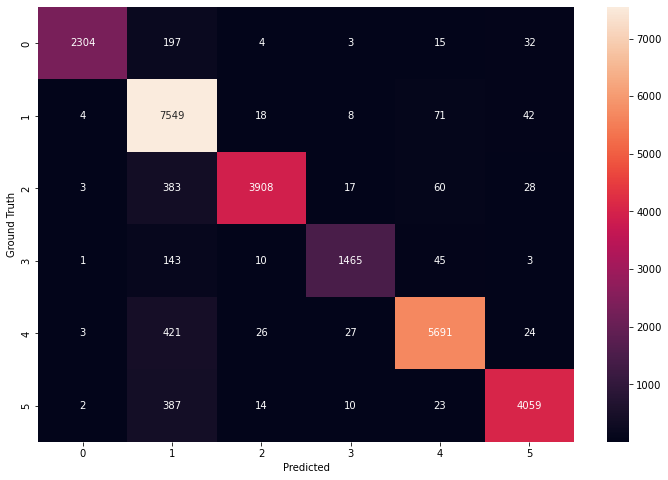

In [131]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_train, train_pred),annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

Text(87.0, 0.5, 'Ground Truth')

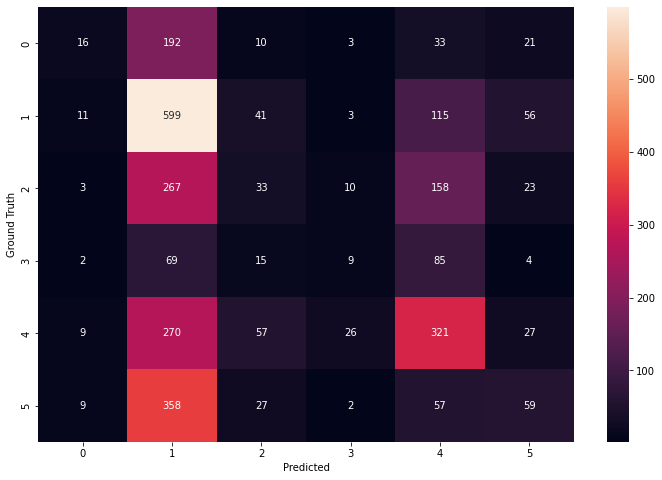

In [130]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, test_pred),annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

## Sintonización de hiperparámetros 

Para sintonizar los hiperparámetros del modelo se hizo uso de la función ***RandomizedSearchGrid*** para realizar una busqueda aleatoria de la mejor combinación de parámetros dentro de un conjunto dado. El parámetro a optimizar en este caso es el promedio de los ***f1 score***. 

In [72]:
parameters = {'n_estimators':[1,10,100,300,500], 
              'max_depth':[1,30,100,300,500],
              'min_samples_split':[0.1,0.15],
              'max_features':['auto', 'sqrt', 'log2'],
              'oob_score':[True,False],
              'max_samples':[0.8,0.9],
              'class_weight':['balanced',None,'balanced_subsample']
              }

In [73]:
scorer = make_scorer(f1_score,average='macro')
clf = RandomizedSearchCV(clf, parameters, random_state=random_seed,cv=5,
                        n_jobs=-1,
                        scoring = scorer,
                        refit = True,
                        verbose=1,
                        n_iter=15)

In [25]:
clf.fit(X_train_os,y_train_os)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to c

[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.8s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[P

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | ela

[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_j

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means to

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 ou

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.3s finished
[Parallel(n_jobs=8)]: Using ba

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Using 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   28.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.9s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.6s finished
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Using backend T

[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
[Parallel(n_jobs

[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.4s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.9s remaining:    2.0s
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend Seq

[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s fini

[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks 

[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.4s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 task

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.3s rem

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using ba

[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.1s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.8min
[Parallel

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  1

[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished
/home/jonat

[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.3s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    6.4s remaining:    4.3s
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s rema

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.2s
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
[Pa

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.5s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.2s finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBa

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
/home/jonat

[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
/home/jonathan/anaco

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed

[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/jonathan/anaconda3/envs/WJ-test-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Pa

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.1s finished
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBacken

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   49.5s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with

[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   28.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.2min finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | 

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=15,
                                                    verbose=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None,
                                                         'balanced_subsample'],
                                        'max_depth': [1, 30, 100, 300, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.8, 0.9],
                                        'min_samples_split': [0.1, 0.15],
                                        'n_estimators': [1, 10, 100, 300, 500],
                                        'oob_score': [True, False]},
                   random_state=15,
                   scoring=make_scorer(f1_score, average=macro), verbose=1)

In [26]:
# Mejor estimador hallado al finalizar la busqueda 
clf.best_estimator_

RandomForestClassifier(max_depth=500, max_features='log2', max_samples=0.9,
                       min_samples_split=0.1, n_estimators=500, n_jobs=-1,
                       random_state=15, verbose=1)

## Evaluación del modelo entrenado con la base de datos balanceada y los parámetros sintonizados 

In [136]:
train_pred = clf.predict(X_train_os)
test_pred = clf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.5s finished


In [102]:
#Validación cruzada sobre el set de entrenamiento para 3 splits. 
cv_results = cross_validate(clf, X_train_os, y_train_os, cv=3, scoring=scorer)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   46.4s finished
[

In [108]:
# Resultados de la validación  
cv_results

{'fit_time': array([41.62146568, 46.64897513, 44.67028427]),
 'score_time': array([1.49693489, 2.41455221, 1.7990768 ]),
 'test_score': array([0.34113783, 0.36780755, 0.37023717])}

In [137]:
print(classification_report(y_train_os,train_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      4500
           1       0.69      0.63      0.66      4500
           2       0.76      0.44      0.56      4500
           3       0.50      0.88      0.64      4500
           4       0.60      0.63      0.62      4500
           5       0.70      0.63      0.66      4500

    accuracy                           0.65     27000
   macro avg       0.68      0.65      0.65     27000
weighted avg       0.68      0.65      0.65     27000



In [138]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.20      0.17      0.19       275
           1       0.42      0.29      0.34       825
           2       0.20      0.12      0.15       494
           3       0.12      0.49      0.19       184
           4       0.41      0.37      0.39       710
           5       0.31      0.31      0.31       512

    accuracy                           0.29      3000
   macro avg       0.28      0.29      0.26      3000
weighted avg       0.33      0.29      0.29      3000



Text(87.0, 0.5, 'Ground Truth')

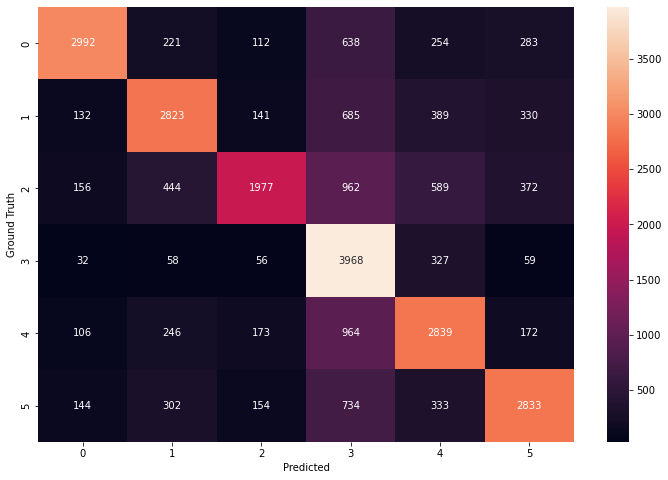

In [139]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_train_os, train_pred),annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

Text(87.0, 0.5, 'Ground Truth')

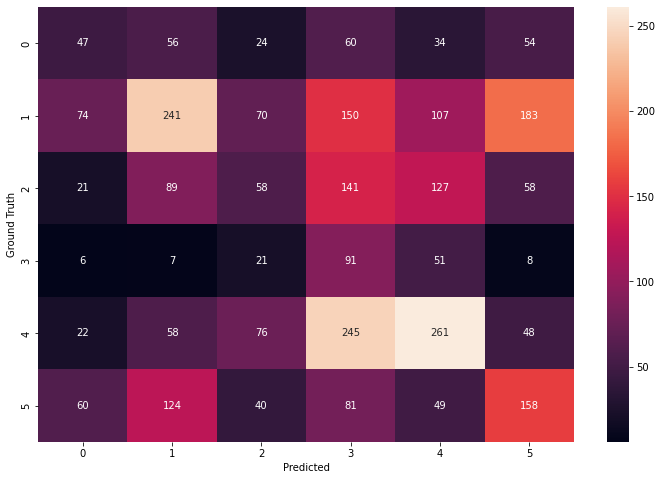

In [140]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, test_pred),annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

# Conclusiones

Al comparar los resultados del modelo con los datos balanceados y desbalanceados se observa una mejora en el promedio del ***f1 score*** de aproximadamente cuatro puntos porcentuales. Así mismo, en las matrices de confusión para los sets de prueba se puede notar cómo el modelo entrenado con los datos desbalanceados se encuentra sesgado a las clases 1 y 4, que corresponden a las clases mayoritarias, de un total de 3000 datos 2524 veces el modelo predice estas dos etiquetas; mientras que, en la matriz de confusión del modelo balanceado se puede notar una mayor difusión entre clases, lo cual es indicativo de que el modelo comienza a tener en cuenta otras edades a la hora de realizar sus predicciones. Esto tambien se ve reflejado en el ***f1 score*** de las dos clases minoritarias, ya que pasaron de tener un ***f1 score*** menor igual a 0.1 en el modelo desbalanceado, a tener un ***f1 score*** de 0.19 en el modelo balanceado.   

Ahora bien, es importante tener en cuenta que un ***f1 score*** promedio de 0.26 es bastante bajo. Sin embargo, considero que con las limitaciones de tiempo dadas es un buen inicial para generar iteraciones del modelo. Posibles puntos a mejorar son: 

1. Probar algoritmos diferentes a RandomForest, es posible que para este caso una red neuronal o un simple naive bayes pueda funcionar mejor que el arbol de decisión. 

2. Hacer una mejor limpieza de datos y construcción del vocabulario, en este proyecto por los límites de tiempo decidí por facilidad utilizar funciones de sklearn para crear el vocabulario y manejar gran parte de la limpieza de los datos. Sin embargo, esto no es suficiente, en esta base de datos tenemos texto en diferentes lenguajes y de diferentes países lo que genera un vocabulario muy amplio que no necesariamente es el mejor para atacar este problema. 

3. Otro punto a mejorar, y el que a mi personalmente me parece el más prometedor, es utilizar técnicas diferentes para representar la información de los tweets. La implementación presentada en este proyecto tiene un problema muy grande y es que los vectores que genera la función ***TfidfVectorizer*** dependen del vocabulario y del largo de cada tweet, esto hace que se generen vectores dispersos (con muchas componentes en cero) ya que el vocabulario es muy grande y los tweets generalmente son cortos. Representaciones diferentes pueden dar mejores resultados, cómo por ejemplo hallar probabilidades de pertenencia a cada clase por palabra y utilizar naive bayes para hallar la probabilidad total de pertenencia del tweet; ó utilizar técnicas de deeplearning cómo word2vec o Glove para tratar de capturar el significado semantico del texto en un espacio de características más rico, y más pequeño que el tamaño del vocabulario.